### Toys Dataset
#### In this data analysis project, we will explore the fictional  toy dataset. The dataset has been filtered so that it contains the toys from various cities in Canada. 

The data has 5 columns
- City is a Canadian Cities
- Gender is the self reported gender of the person
- Age is a integer that represents how old the person in in the record is
- Income the annual salary of the person as an integer
- ill a 'Yes' or 'No' to indicate if the person is suffering from our mystery illness


We will explore the dataset and find any insights from it. Python 3 will be used to perform analysis and visualizations.

In [7]:
#  Load the libraries
import pandas as pd
import numpy as np


Load the data into pandas dataframe. This data is already clean and no data cleaning is required. Let's take a look at the first 10 observations.


In [8]:
data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")
data.columns = ["city","gender","age","income","ill"]
data.head()

,city,gender,age,income,ill
0,Montreal,Male,41,40367,No
1,Montreal,Male,54,45084,No
2,Montreal,Male,42,52483,No
3,Montreal,Male,40,40941,No
4,Montreal,Male,46,50289,No


Basics statistics for numerical variables

In [9]:
data.describe()

,age,income
count,150000.000000,150000.000000
mean,44.950200,91252.798273
std,11.572486,24989.500948
min,25.000000,-654.000000
25%,35.000000,80867.750000
50%,45.000000,93655.000000
75%,55.000000,104519.000000
max,65.000000,177157.000000


### General Questions about from the dataset

#### 1. How many people are ill ?

In [14]:
# data.groupby("ill").count()
data[data["ill"] == "Yes"].ill.count()

12139

#### 2. How many people are Male in this dataset ?

In [16]:
data[data["gender"] == "Male"].gender.count()

83800

#### 3. How many different cities are in the dataset?

In [36]:
data['city'].value_counts()

Toronto      50307
Vancouver    32173
Montreal     19707
Waterloo     14219
Edmonton     12292
Halifax       8301
Ottawa        8120
Regina        4881
Name: city, dtype: int64

#### 4. What is the average income of people in Waterloo ?


In [21]:
data.groupby("city")["income"].mean()

city
Edmonton      90277.513423
Halifax       91554.571497
Montreal      45252.231187
Ottawa        70991.612808
Regina       100756.209178
Toronto       96857.131393
Vancouver     95264.155410
Waterloo     135078.415782
Name: income, dtype: float64

#### 5.  What is the average age of people in each city?

In [22]:
data.groupby("city")["age"].mean()

city
Edmonton     44.651237
Halifax      45.197807
Montreal     45.058761
Ottawa       44.802709
Regina       44.965171
Toronto      44.922118
Vancouver    44.994094
Waterloo     44.992756
Name: age, dtype: float64

#### 6. What is the minimum age seen in the data?

In [24]:
data["age"].min()

25

#### 7. What is the maximum age seen in the data?

In [25]:
data["age"].max()

65

#### 8. What is the maximum income seen in the data?

In [26]:
data["income"].max()

177157

#### 9. What is the minimum income seen in the data?


In [29]:
data["income"].min()

-654

#### 10. What is the city with the most ill people ?


In [35]:
most_ill_city = data.groupby("city").count().sort_values(by="ill", ascending = False).ill
most_ill_city

city
Toronto      50307
Vancouver    32173
Montreal     19707
Waterloo     14219
Edmonton     12292
Halifax       8301
Ottawa        8120
Regina        4881
Name: ill, dtype: int64

#### 11. Create  a new dataframe that just has people from Waterloo in it. Display the first 5 entries.

In [37]:
waterloo_people = data[data["city"] == "Waterloo"]
waterloo_people.head()

,city,gender,age,income,ill
102187,Waterloo,Male,31,150367,No
102188,Waterloo,Female,36,130426,No
102189,Waterloo,Female,42,130216,No
102190,Waterloo,Male,62,143263,No
102191,Waterloo,Female,48,152273,No


#### 12. Describe the dataframe created above

In [38]:
waterloo_people.describe()

,age,income
count,14219.000000,14219.000000
mean,44.992756,135078.415782
std,11.562080,11227.302304
min,25.000000,95202.000000
25%,35.000000,127482.000000
50%,45.000000,135220.000000
75%,55.000000,142738.500000
max,65.000000,177157.000000


#### 13. Create a new dataframe that just has ill people.

In [41]:
ill_people = data[data["ill"] == "Yes"]
ill_people.describe()

,age,income
count,12139.000000,12139.000000
mean,45.020842,91277.875360
std,11.554130,25094.894386
min,25.000000,-654.000000
25%,35.000000,80796.000000
50%,45.000000,93779.000000
75%,55.000000,104672.500000
max,65.000000,166458.000000


#### 14. Can you display how many people are ill in each city ?

In [51]:
ill_people_per_city = ill_people["city"].value_counts().sort_values(ascending= False)
ill_people_per_city

Toronto      4021
Vancouver    2568
Montreal     1613
Waterloo     1178
Edmonton     1011
Halifax       686
Ottawa        668
Regina        394
Name: city, dtype: int64

#### 15. What is the average age of people in the ill_people dataset?

In [52]:
avg_age_ill_people = ill_people["age"].mean()
avg_age_ill_people

45.02084191449048

#### 16. What percentage of people in the ill_people dataset have a salary over $100000. 

In [57]:
percent_people_100k = len(ill_people[ill_people["income"] > 100000])/ len(ill_people)
percent_people_100k*100

35.06878655572947

#### 17. Can change the ill column values so that No is encoded as 0 and Yes is encoded as 1 ?


In [59]:
data["ill"].replace({"No":0, "Yes":1}, inplace = True)

### Data visualizations

In [76]:
#Load data
graph_data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")

#data columns
graph_data.columns = ["city","gender","age","income","ill"]

graph_data.head(3)

,city,gender,age,income,ill
0,Montreal,Male,41,40367,No
1,Montreal,Male,54,45084,No
2,Montreal,Male,42,52483,No


In [66]:
# Import visualization libraries
import matplotlib.pyplot as plt

### Let's make some Pies

#### Draw a pie chart of the number of people that are ill versus people that are not ill. 

In [68]:
all_ill_people = graph_data[graph_data["ill"] == "Yes"].ill.count()
all_ill_people

12139

In [69]:
all_non_ill_people = graph_data[graph_data["ill"] == "No"].ill.count()
all_non_ill_people

137861

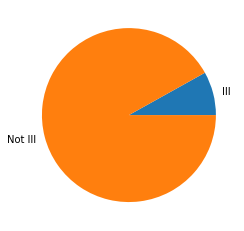

In [70]:
pie_data = [all_ill_people, all_non_ill_people]
pie_labels = ["Ill", "Not Ill"]
plt.pie(pie_data, labels = pie_labels)
plt.show()

#### 18. Create a pie graph that shows the gender distribution in the data? 


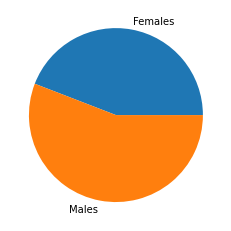

In [72]:
females_ills = graph_data[graph_data["gender"] == "Female"]["ill"].count()
males_ills = graph_data[graph_data["gender"] == "Male"]["ill"].count()
pie_gender_data = [females_ills, males_ills]
pie_gender_labels = ["Females", "Males"]
plt.pie(pie_gender_data, labels = pie_gender_labels)
plt.show()

#### 19.  Create a pie graph that shows the how many people in the dataset make over 100000 annual income? 

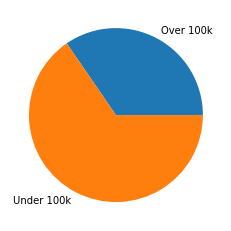

In [73]:
over_100k = graph_data[graph_data["income"] > 100000]["income"].count()


under_100k = graph_data[graph_data["income"] < 100000]["income"].count()

pie_data = [over_100k, under_100k]
pie_labels = ["Over 100k","Under 100k"]
plt.pie(pie_data,labels=pie_labels)

plt.show()

### Histograms

### Histogram of the Age distribution

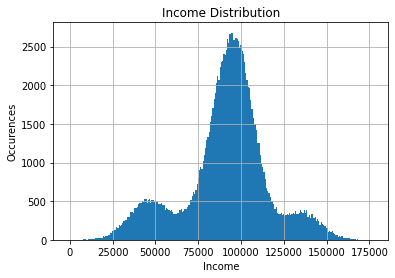

In [80]:
bins = 250
plt.hist(graph_data["income"], bins)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Occurences")
plt.grid()
plt.show()

### Histogram of Age Distribution 


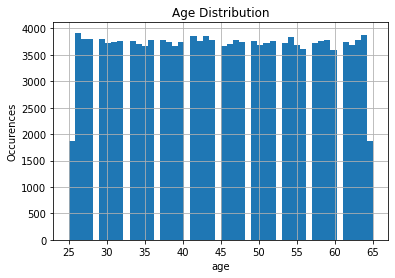

In [82]:
bins = 50
plt.hist(graph_data["age"], bins)
plt.title("Age Distribution")
plt.xlabel("age")
plt.ylabel("Occurences")
plt.grid()
plt.show()